In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the cleaned dataset
data = pd.read_csv('cleaned_student_data2.csv')

In [2]:
# Filter out G1 and G2
data = data.drop(columns=['G1', 'G2'])

# Check the distribution of the target variable G3 before binarization
print("Distribution of G3 before binarization:")
print(data['G3'].value_counts())

# Define the target variable
target = 'G3'

# Using the median of G3 as the threshold for binarization
median_G3 = data[target].median()
print(f"Median of G3: {median_G3}")

# Binarize the target variable: Above median (Pass) or Below median (Fail)
y = np.where(data[target] >= median_G3, 1, 0)

# Check the distribution of classes after binarization
print(f"Distribution of target variable after binarization: {np.bincount(y)}")

Distribution of G3 before binarization:
G3
-0.719892    67
 0.136137    59
 0.564151    52
-0.291877    50
-1.147906    43
 0.992165    41
 1.420179    28
 1.848194    20
-1.575920    16
-2.003934    12
 2.276208     4
-2.431948     1
Name: count, dtype: int64
Median of G3: 0.1361368255842745
Distribution of target variable after binarization: [189 204]


Distribution of G3 Before and After Binarization
Before Binarization:

The target variable G3 has a diverse range of values, but the distribution is centered around the median value of 0.1361.
The values are roughly symmetrical around this median, but there are more observations closer to the median and fewer as we move further away.
After Binarization:

The dataset has been divided into two classes based on the median of G3.
Class 0 (below median): 189 observations.
Class 1 (above median): 204 observations.
This split is relatively balanced, which is beneficial for training machine learning models as it helps in preventing bias towards a majority class.
Takeaway:

The binarization process effectively splits the data into two balanced classes, facilitating binary classification.

In [3]:
# Split the dataset into training and testing sets
X = data.drop(columns=[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution of classes in train and test sets
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Test set class distribution: {np.bincount(y_test)}")

Training set class distribution: [151 163]
Test set class distribution: [38 41]


In [4]:
# Define models for training
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train the models
trained_models = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = model
    print(f'{model_name} model trained.')

Logistic Regression model trained.
Random Forest model trained.


In [5]:
# Evaluate the models
for model_name, model in trained_models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f'\n{model_name} Model Evaluation:')
    print(f'Training Accuracy: {accuracy_score(y_train, y_pred_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred_test)}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred_test))
    print('Classification Report:')
    print(classification_report(y_test, y_pred_test))


Logistic Regression Model Evaluation:
Training Accuracy: 0.7802547770700637
Testing Accuracy: 0.7215189873417721
Confusion Matrix:
[[25 13]
 [ 9 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.69        38
           1       0.71      0.78      0.74        41

    accuracy                           0.72        79
   macro avg       0.72      0.72      0.72        79
weighted avg       0.72      0.72      0.72        79


Random Forest Model Evaluation:
Training Accuracy: 1.0
Testing Accuracy: 0.6582278481012658
Confusion Matrix:
[[22 16]
 [11 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62        38
           1       0.65      0.73      0.69        41

    accuracy                           0.66        79
   macro avg       0.66      0.66      0.65        79
weighted avg       0.66      0.66      0.66        79



Model Evaluation
Logistic Regression:

Training Accuracy: 0.78
Testing Accuracy: 0.72
Confusion Matrix: [[25, 13], [9, 32]]
Classification Report:
Precision and recall scores are balanced around 0.72 for both classes.
This indicates the model performs reasonably well, with a slightly higher recall for class 1.
Random Forest:

Training Accuracy: 1.0
Testing Accuracy: 0.66
Confusion Matrix: [[22, 16], [11, 30]]
Classification Report:
The training accuracy of 1.0 indicates overfitting, as the model perfectly classifies the training data but performs worse on the test data.
The testing accuracy is lower compared to logistic regression, and the precision and recall scores are also lower.
Takeaway:

Logistic regression provides a better balance between training and testing performance, while the random forest model overfits to the training data. Further tuning of the random forest model (e.g., limiting depth, reducing the number of features) may be needed to improve its generalization.


Top 10 important features according to Random Forest:
health       0.075270
absences     0.067937
Medu         0.060851
goout        0.053998
studytime    0.049148
Walc         0.047588
age          0.045985
Fedu         0.045006
freetime     0.039652
famrel       0.037109
dtype: float64


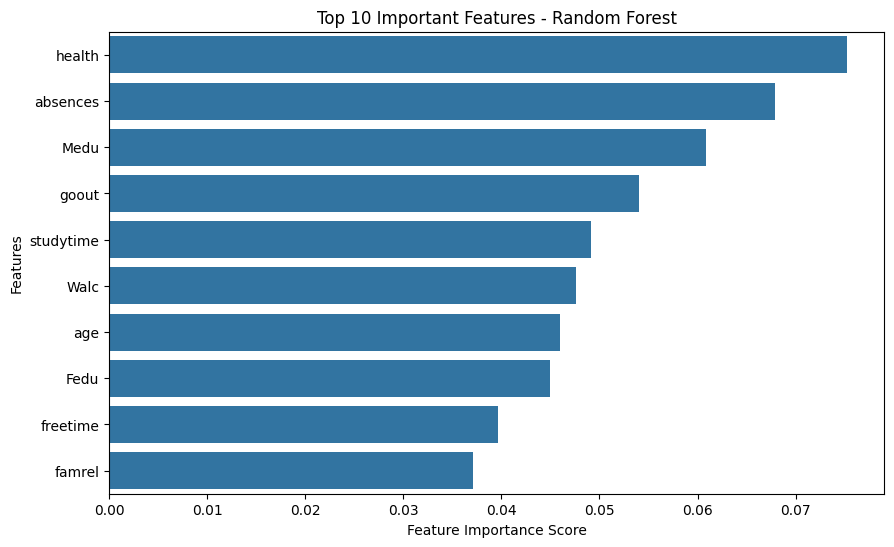

In [6]:
# Feature Importance Analysis (for Random Forest)
if 'Random Forest' in trained_models:
    rf_model = trained_models['Random Forest']
    feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print(f"\nTop 10 important features according to Random Forest:")
    print(feature_importance.head(10))

    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index)
    plt.title('Top 10 Important Features - Random Forest')
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.show()

Takeaway:

Health, absences, and parental education (Medu and Fedu) are significant predictors of student performance.
Social and extracurricular activities (goout, Walc) also play a role, indicating the importance of balance between academics and social life.

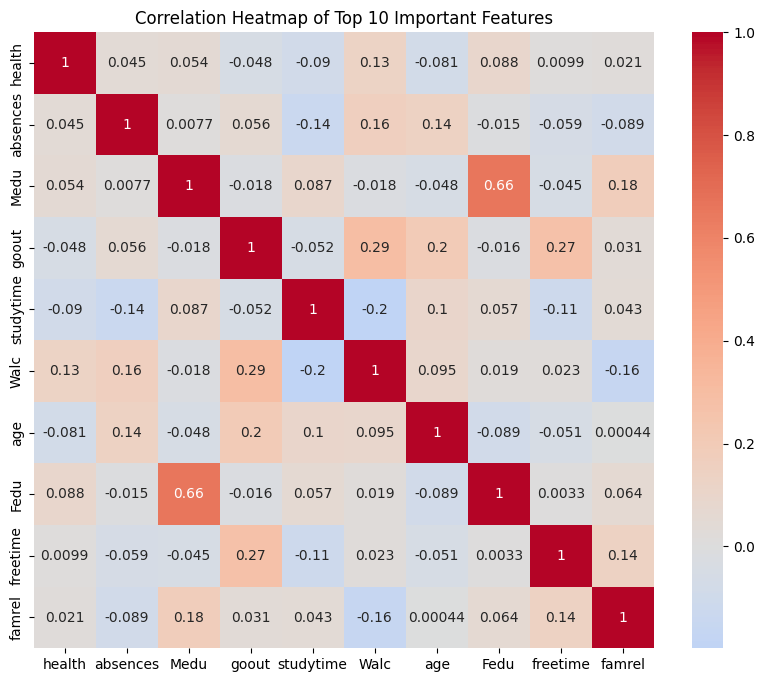

In [7]:
# 1. Correlation Heatmap for Top Features
top_features = feature_importance.head(10).index

plt.figure(figsize=(10, 8))
sns.heatmap(data[top_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Top 10 Important Features')
plt.show()

Correlation Heatmap for Top 10 Features
Analysis:

The heatmap shows weak to moderate correlations between the top 10 important features.
Notable correlations include Medu and Fedu (0.66), indicating that higher education levels of parents are related.
The correlations between other features are relatively low, suggesting that these features independently contribute to the target variable.
Takeaway:

The diversity in the top features' correlation values indicates that multiple independent factors influence student performance.

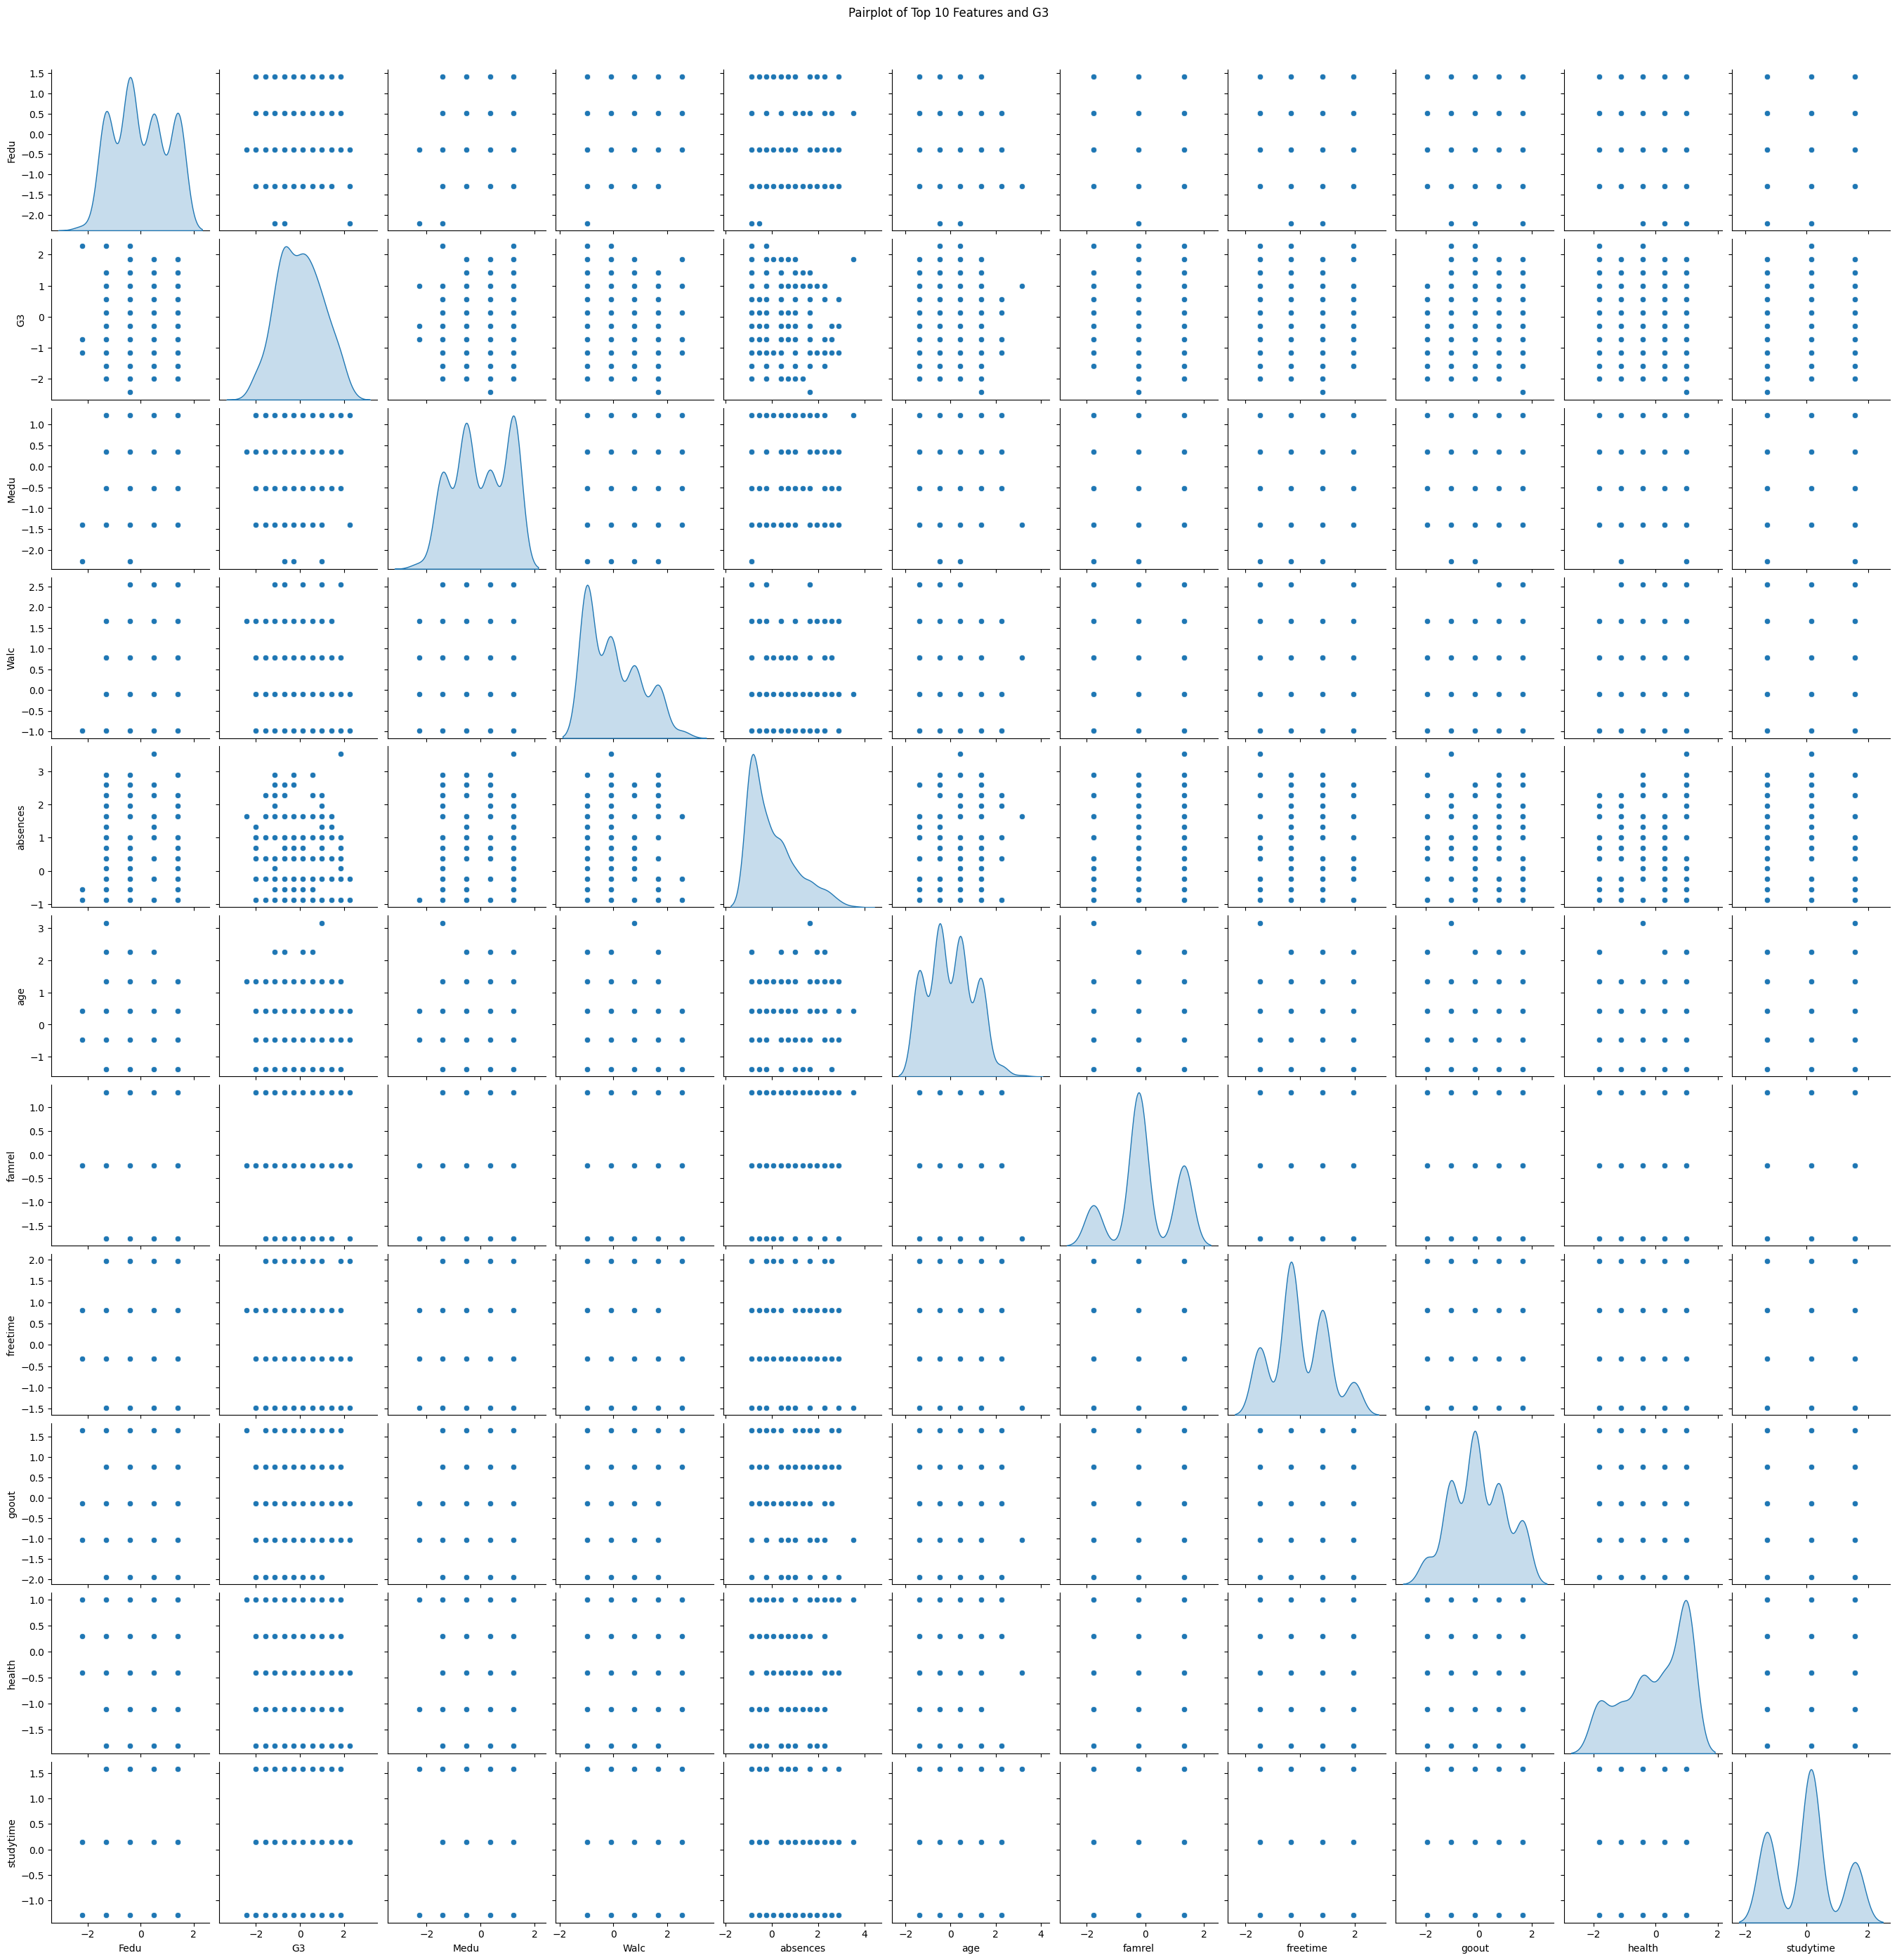

In [8]:
# 2. Pairplot for Top Features
sns.pairplot(data[top_features.union([target])], diag_kind='kde', kind='scatter')
plt.suptitle(f'Pairplot of Top 10 Features and {target}', y=1.02)
plt.show()

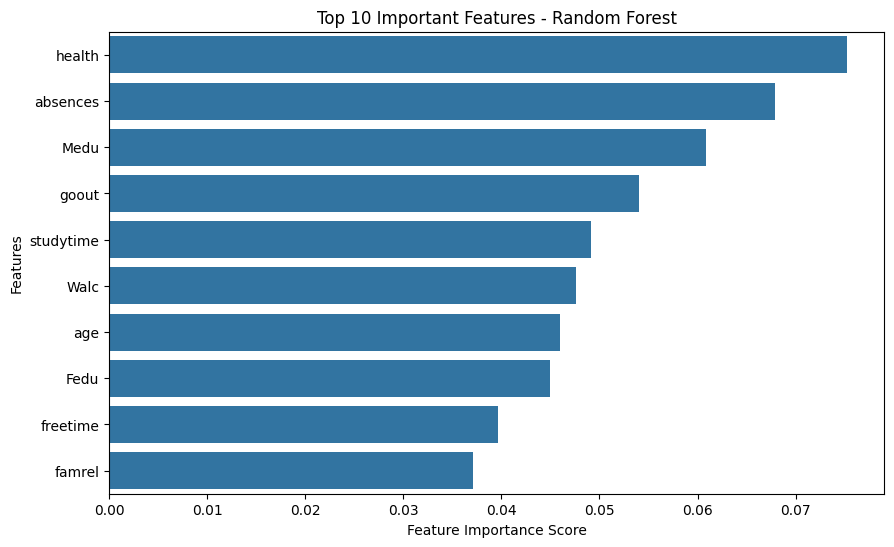

In [9]:
# 3. Bar Plot of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index)
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

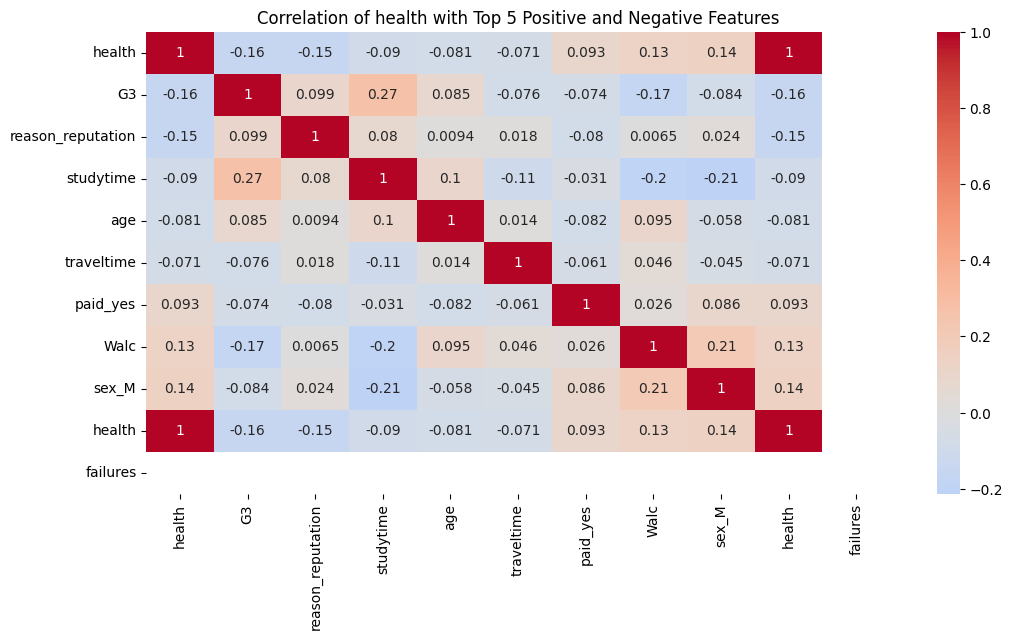

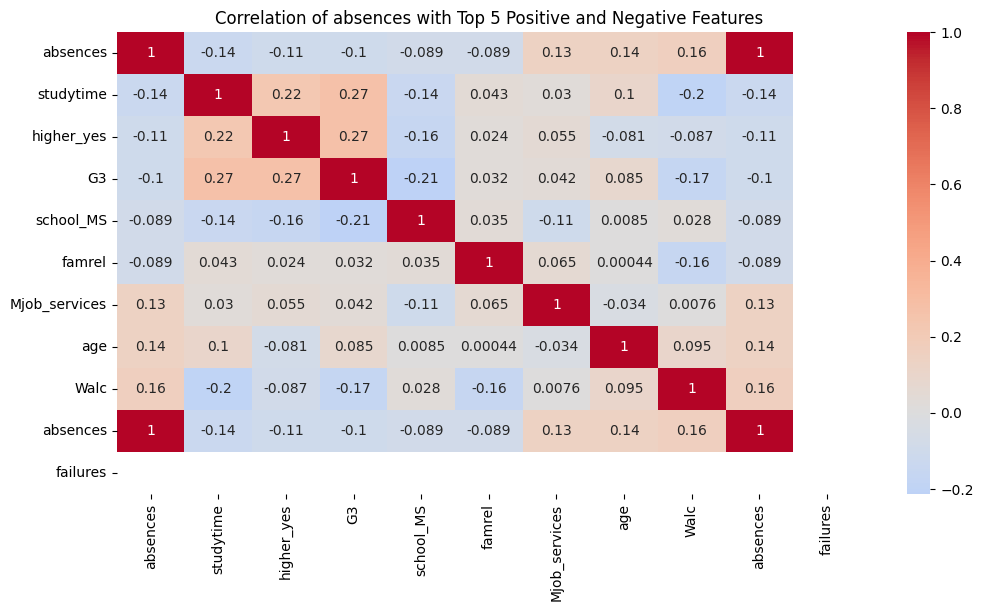

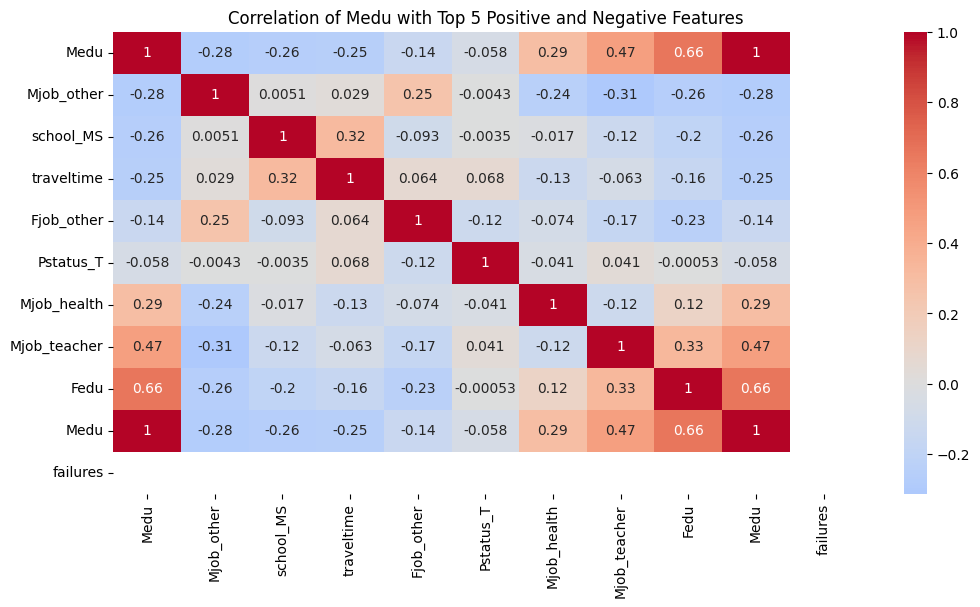

Done


In [10]:
# 4. Detailed Correlation Analysis for Top 3 Features
top_3_features = feature_importance.head(3).index

for feature in top_3_features:
    corr_feature = data.corr()[feature].sort_values()
    top_5_neg = corr_feature.head(5).index
    top_5_pos = corr_feature.tail(5).index
    top_10_corr_features = top_5_neg.append(top_5_pos)
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(data[[feature] + list(top_10_corr_features)].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation of {feature} with Top 5 Positive and Negative Features')
    plt.show()

print("Done")

Detailed Correlation Analysis for Top 3 Features
Health:

Weak negative correlation with G3 (-0.16).
Shows some correlation with other variables like Walc (0.13), indicating a potential influence of health on alcohol consumption and vice versa.
Absences:

Weak negative correlation with G3 (-0.10).
Correlation with studytime (0.14) and higher education aspiration (higher_yes: 0.11), indicating that students with fewer absences tend to have better study habits and higher educational aspirations.
Medu:

Weak positive correlation with G3 (0.24).
Strong correlation with Fedu (0.66) and moderate correlation with Mjob_teacher (0.47), indicating the influence of parental education and occupation on student performance.
Takeaway:

Health, absences, and parental education (Medu) are important features that show varied levels of influence on student performance.
These correlations highlight the multifaceted nature of factors affecting student success, encompassing health, attendance, and parental background.